## stockAir
stockAir is an integrated library for stock price big data research. From data loading to data preprocessing, machine learning model learning to backtesting, everything is available in this library.

This file shows the overall flow using stockAir.

And Proceed with the following flow:  
`Data Acquisition` - `Data Preprocessing` - `Trader Definition` - `Trader(Model) Fitting & Evaluation` - `Back Testing`

In [2]:
import pandas as pd
import os
import sys
sys.path.append("/project/stockAir/github/main/stockAir")
import stockAir as sai

# 1. Data Acquisition
>1\) Bringing up markets by country: `sai.get_markets(country:list)`   
>2) Bringing up stocks by market: `sai.get_tickers(date:list, tickers:list=None)`    
>3) Load Data: `sai.load_data(date:list, tickers:list=None)`   

<br>

StockAir has a total of 69 stock market share data available. The list of available markets is as follows:

`'KOSPI', 'KOSDAQ', 'KONEX', 'PNK', 'NMS', 'NYQ', 'ASX', 'NCM', 'NGM', 'ASE', 'JKT', 'GER', 'PAR', 'TOR', 'BRU', 'OBB', 'BUE', 'LSE', 'KLS', 'PCX', 'VAN', 'AMS', 'EBS', 'TWO', 'OSL', 'STO', 'CPH', 'VIE', 'SAO', 'SES', 'NSI', 'MEX', 'HKG', 'NZE', 'MCE', 'BSE', 'ISE', 'FRA', 'MCX', 'MIL', 'MUN', 'ATH', 'BER', 'ENX', 'STU', 'LIS', 'TLV', 'DUS', 'IST', 'HAM', 'HAN', 'TAL', 'TLO', 'SET', 'TAI', 'HEL', 'ICE', 'IOB', 'CNQ', 'RIS', 'KSC', 'LIT', 'KOE', 'DOH', 'EUX', 'SHH', 'CCS', 'MDD', 'SHZ', 'MAD'`



 

### 1) Bringing up markets by country 
You can bring in markets that correspond to a particular country for stock price data research.

In [3]:
lst_markets = sai.get_markets(countries=['KOREA'], date=2016)
print(len(lst_markets), lst_markets[:5])

AttributeError: module 'stockAI' has no attribute 'get_markets'

### 2) Bringing up stocks by market
You can bring in the stocks of the market you want.

In [4]:
lst_tickers = sai.get_tickers(markets=['KOSPI'], date=2016)
print(len(lst_tickers), lst_tickers[:5])

948 ['095570', '006840', '282330', '027410', '138930']


In [10]:
cnt = 0 
for ticker in lst_tickers: 
    if 'K' in ticker: 
        cnt += 1
print(cnt)

18


### 3) Load Data
If you specify the date and stock of the stock price data you want to study, you can recall the corresponding data.

In [ ]:
raw_data = sai.load_data(date=['2016-01-01', '2021-12-31'], tickers=lst_tickers)
print(raw_data.shape)
raw_data.head()

# 2. Data Preprocessing
>1\) Add Secondary Indicators: `sai.add_index(data:pd.DataFrame(), index_list:list)`   
>2) scaling: `sai.scaling(data:pd.DataFrame(), scaler_type:String, window_size:Int=None)`   
>3) Convert to time series data: `sai.time_series(data:pd.DataFrame(), day:Int=10)`

### 1) Add Secondary Indicators

- **Transaction price (end price * volume), the rate of change in the closing price of the next day (dependent variable)**  
'trading_value','next_change'

- **TA Package Delivery Assistance Indicators**  
'MA5', 'MA20', 'MA60','MA120', 'MFI','ADI','OBV','CMF','FI','EOM_EMV','VPT','NVI','VMAP', 'BHB','BLB','KCH','KCL','KCM','DCH','DCL','DCM','UI', 'SMA','EMA','WMA','MACD','VIneg','VIpos','TRIX','MI','CCI', 'DPO','KST','Ichimoku','ParabolicSAR','STC', 'RSI','SRSI','TSI','UO','SR','WR','AO','KAMA','ROC','PPO','PVO'

You can add up to 49 auxiliary indicators as a function to add auxiliary indicators.  
( \* The default dependent variable set in stockAI is next_change, which is added here. )

In [ ]:
check_index = ['MA5', 'MA20', 'MA60','MA120', 
             'trading_value','next_change',
             'MFI','ADI','OBV','CMF','FI','EOM_EMV','VPT','NVI','VMAP',
             'BHB','BLB','KCH','KCL','KCM','DCH','DCL','DCM','UI',
             'SMA','EMA','WMA','MACD','VIneg','VIpos','TRIX','MI','CCI','DPO','KST','Ichimoku','ParabolicSAR','STC',
             'RSI','SRSI','TSI','UO','SR','WR','AO','KAMA','ROC','PPO','PVO']

check_df = sai.add_index(data=raw_data, index_list=check_index)
check_df

In [ ]:
check_df = check_df.drop(columns=['Market'])
check_df.shape

### 2) scaling 

Standardization of stock price data offers four methods: the previously well-known minmax, standard, robust scalers, and the previous day's closing price to standardize.
- minmax
- standard
- robust
- div-close

In [ ]:
check_scaled_KR = sai.scaling(data=check_df, scaler_type="div-close", window_size=None)
check_scaled_KR

### 3) Convert to time series data

When machine learning model predicted that machine learning model prediction, D0 to generate n-day data (D-n-1, D-1, D-1, D-1, D-1 and D0).

For example, the example code below shows that transformed into the D0 standard 10 days series data.

In [ ]:
df_time_series = sai.time_series(check_df, day=10)
df_time_series_scaled = sai.time_series(check_scaled_KR, day=10)
df_time_series_scaled

In [ ]:
df_time_series.to_csv("time_series_0204.csv", index=False)
df_time_series_scaled.to_csv("time_series_scaled_0204.csv", index=False)

**\* If the data is large, it takes a long time to preprocess the data, so it stores the preprocessed data, and below, it loads the stored data and uses it.**

In [3]:
df_time_series = pd.read_parquet("../../../../_common/time_series_0212.parquet")
df_time_series_scaled = pd.read_parquet("../../../../_common/time_series_scaled_0212.parquet")

df_time_series = df_time_series[df_time_series["Code"] != "33626K"]
df_time_series_scaled = df_time_series_scaled[df_time_series_scaled["Code"] != "33626K"]

df_time_series['Code'] = df_time_series['Code'].astype(str).str.zfill(6)
df_time_series_scaled['Code'] = df_time_series_scaled['Code'].astype(str).str.zfill(6)

Split the train, test dataset by specifying a date by the user himself.

In [4]:
data = df_time_series # Data Before Scaling
data_scaled = df_time_series_scaled # Data After Scaling

# train, test dataset split
train_data = data[(data['Date'] >= '2017-01-01') & (data['Date'] <= '2020-12-31')]
test_data = data[(data['Date'] >= '2021-01-01') & (data['Date'] <= '2021-12-31')]

# train, test dataset split (scaled) 
train_data_scaled = data_scaled[(data_scaled['Date'] >= '2017-01-01') & (data_scaled['Date'] <= '2020-12-31')]
test_data_scaled = data_scaled[(data_scaled['Date'] >= '2021-01-01') & (data_scaled['Date'] <= '2021-12-31')]

print(train_data.shape, test_data.shape)
print(train_data_scaled.shape, test_data_scaled.shape)

(836912, 543) (221193, 543)
(836912, 543) (221193, 543)


Here, the train from 2017 to 2020 and 2021 are set as test.

# 3. Trader Definition
 StockAI uses `Trader` as the concept of trading stocks. Artificial intelligence model learning, evaluation, and yield simulation are all done through `Trader`. So, for the first time, you have to define a `trader`.

- Traders have (1) `buyer` and (2) `seller`.
    - (1) `Buyer` is an object for buying, and (1.1) `conditional_buyer` and (1.2) `machine learning_buyer` exist.
        - (1.1) `conditional_buyer` is an object that determines acquisition as a condition of data filtering.
        - (1.2) `machine learning_buyer` is an object that determines the acquisition using a machine learning model, and the machine learning model is defined and the model is learned.
        - Finally, (1.1) and (1.2) above are combined to determine the buying.
    - (2) `Seller` is an object for sale. If you call the `SubSeller` object and put it in the `Seller`'s factor, it will be sold all the next day as default values.

In [5]:
# List containing trader objects 
# You can put a bunch of traders in here, and you can trade at once. 
# See 'tutorials/01.trader_definition.ipynb' for a detailed example.
lst_trader = [] 

In [6]:
from lightgbm import LGBMClassifier

# conditional_buyer: Object that determines acquisition based on data filtering conditions 
b1_lg = sai.ConditionalBuyer()

def sampling1(df): # Create a conditional function
    condition1 = (-0.3 <= df.D0_Change) & (df.D0_Change <= 0.3) # Remove exceptions that exceed upper and lower limits
    condition2 = df.D0_trading_value >= 1000000000 # condition 1: Transaction amount of more than 1 billion won 
    condition3 = (-0.05 >= df.D0_Change) | (0.05 <= df.D0_Change) # condition 2: Today's stock price change rate is more than 5%
    condition = condition1 & condition2 & condition3
    return condition

b1_lg.condition = sampling1  # Define the condition function directly (sampling1) and store it in the condition property 


# machinelearning_buyer: Object that determines acquisition by machine learning model
b2_lg = sai.MachinelearningBuyer()

# Save user-defined models to algorithm properties
scale_pos_weight = round(72/28 , 2)
params = {  'random_state' : 42,
            'scale_pos_weight' : scale_pos_weight,
            'learning_rate' : 0.1, 
            'num_iterations' : 1000,
            'max_depth' : 4,
            'n_jobs' : 30,
            'boost_from_average' : False,
            'objective' : 'binary' }

b2_lg.algorithm =  LGBMClassifier( **params )


# SubSeller: Object that determines selling all of the following days
sell_all = sai.SubSeller() 


# Trader Object   
t1 = sai.Trader()
t1.name = 'saiLightGBM' # Trader's name
t1.label = 'class&0.02' # Set the Trader dependent variable (do not set if it is regression analysis) 
t1.buyer = sai.Buyer([b1_lg, b2_lg]) # [ conditional buyer, machinelearning buyer ] 
t1.seller = sai.Seller(sell_all)

lst_trader.append(t1)

# 4. Trader(Model) Fitting & Evauation
>1\) Save Dataset to Traders: `sai.save_dataset(lst_trader:list, train_data:pd.DataFrame(), test_data:pd.DataFrame(), train_data_scaled:pd.DataFrame()=None, test_data_scaled:pd.DataFrame()=None)`  
>2) Model fitting: `sai.trader_train(lst_trader:list)`   
>3) Model evaluation and threshold settings: `sai.get_eval_by_threshold(lst_trader)`, `sai.set_threshold(lst_trader, lst_threshold:list, hisogram:bool=True)`

### 1) Save Dataset to Traders 
Put the list of trader objects stored, train, and test datasets as factors. At this point, if you've standardized, you'll also put in a standardized dataset.

**[Types of Data Stored]**
- Original dataset (training/test, independent/dependent_regression/dependent_classification)
- Standardized dataset (training/test, independent/dependent variables_regression/dependent variables_classification)

In [7]:
sai.save_dataset(lst_trader, train_data, test_data, train_data_scaled, test_data_scaled)

== saiLightGBM ==
== train_code_date: (836912, 2),  test_code_date: (221193, 2) ==
== trainX: (836912, 540),  testX: (221193, 540) ==
== trainX_scaled: (836912, 540),  testX_scaled: (221193, 540) ==
== trainY: (836912,),  testY: (221193,) ==
== trainY_classification: (836912,),  testY_classification: (221193,) ==



### 2) Model fitting
Model learning is carried out with machine learning models and learning datasets stored in each trader.

In [8]:
sai.trader_train(lst_trader) 

== saiLightGBM Model Fitting Completed ==


### 3) Model evaluation and threshold settings
#### Model evaluationModel evaluation
Four metrics are used to evaluate the performance of the model: auc score, precision, recall, f1 score. In the second graph, you can consider the threshold setting by checking the threshold-specific evaluation index of the model prediction probabilities.

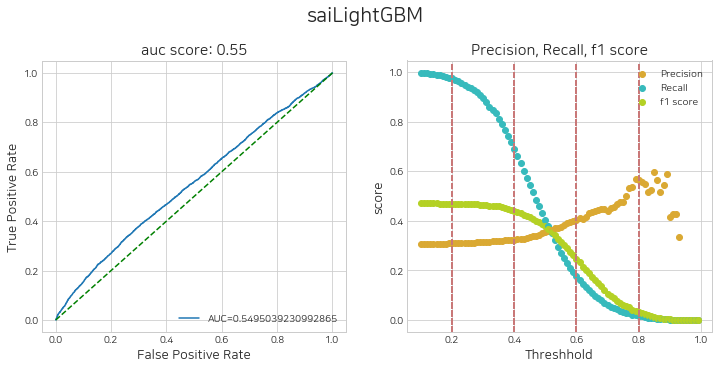

In [9]:
sai.get_eval_by_threshold(lst_trader)

#### threshold settings
For stock trading, the predictive probability threshold of machine learning_buyer must be set. If you put a list of values in the lst_threshold factor in the order of traders, the threshold is stored in the machine learning_buyer object, and profitability can be verified in advance with a histogram plot.

Error: local variable 'threshold' referenced before assignment


<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

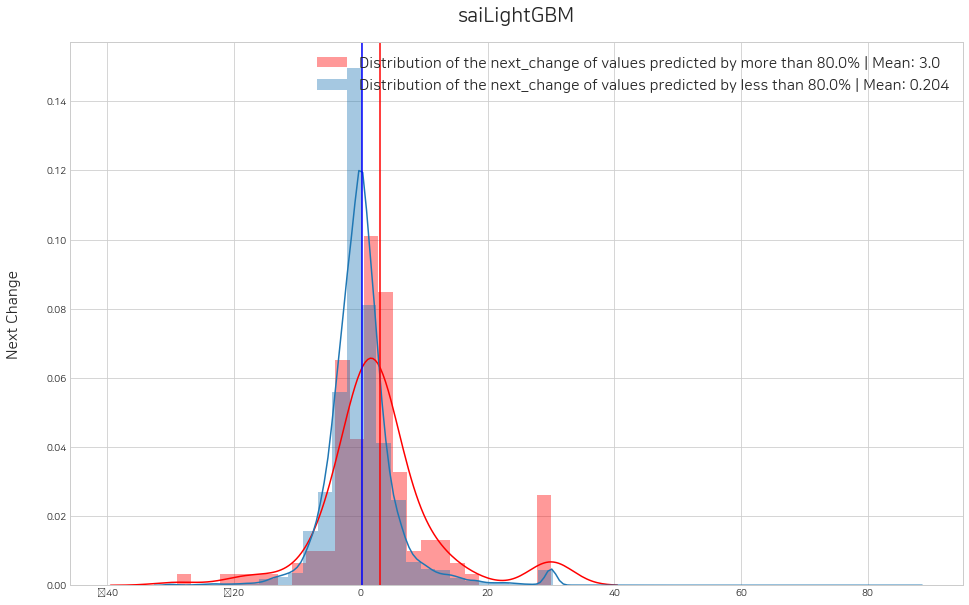

In [10]:
sai.set_threshold(lst_trader, lst_threshold=[0.8], histogram=True)

# 4. Back-Testing
>1\) Making a sales log: `sai.decision(lst_trader:list, dtype='test', data=None, data_scaled=None)`  
>2) Simulation: Calculate the yield: `sai.simulation(df_signal_all, init_budget, init_stock)`  
>3) Leader Board: `sai.leaderboard(df)`   
>4) Visualize Results: `sai.yield_plot(df)`

### 1) Making a sales log
 Write a sales log for each trader and combine it into one DataFrame. The transaction log is made for all dates, and Amount means the percentage to buy/sell.

In [11]:
df_signal_all = sai.decision(lst_trader, dtype='test')
df_signal_all

221193it [00:06, 35080.05it/s]
221193it [00:06, 35492.24it/s]


== saiLightGBM complete ==


,Trader_id,Date,Code,+(buy)/-(sell),Amount,Close
0,saiLightGBM,2021-01-04,000020,+,0.0,19100.0
1,saiLightGBM,2021-01-05,000020,+,0.0,19400.0
2,saiLightGBM,2021-01-06,000020,+,0.0,19700.0
3,saiLightGBM,2021-01-07,000020,+,0.0,19700.0
4,saiLightGBM,2021-01-08,000020,+,0.0,19100.0
...,...,...,...,...,...,...
221188,saiLightGBM,2021-12-24,009900,-,1.0,30600.0
221189,saiLightGBM,2021-12-27,009900,-,1.0,29900.0
221190,saiLightGBM,2021-12-28,009900,-,1.0,29400.0
221191,saiLightGBM,2021-12-29,009900,-,1.0,29850.0


### 2) Simulation: Calculate the yield
Calculate the yield for each trader based on the sales log.

In [12]:
df_history_all = sai.simulation(df_signal_all, init_budget=10000000, init_stock={})
df_history_all

100%|███████████████████████████████████████████████████████████████████████████████████████████████▌| 247/248 [00:07<00:00, 32.95it/s]

== saiLightGBM complete ==


,Trader_id,Sell_date,Budget,Yield,Stock
0,saiLightGBM,2021-01-04,10000000,0.00000,{}
1,saiLightGBM,2021-01-05,10860611,8.60611,{'006340': 7142}
2,saiLightGBM,2021-01-06,10860611,8.60611,{}
3,saiLightGBM,2021-01-07,10860611,8.60611,{}
4,saiLightGBM,2021-01-08,10860611,8.60611,{}
...,...,...,...,...,...
243,saiLightGBM,2021-12-24,20660221,106.60221,{}
244,saiLightGBM,2021-12-27,20591127,105.91127,{'249420': 772}
245,saiLightGBM,2021-12-28,20591127,105.91127,{}
246,saiLightGBM,2021-12-29,20591127,105.91127,{}


### 3) Leader Board
You can view traders' total returns by sorting them in high order. It's the same as the trader's ranking.

In [13]:
sai.leaderboard(df_history_all)

,Trader_id,Yield
0,saiLightGBM,105.91127


### 4) Visualize Results
You can see the change in yield by trader over the date.

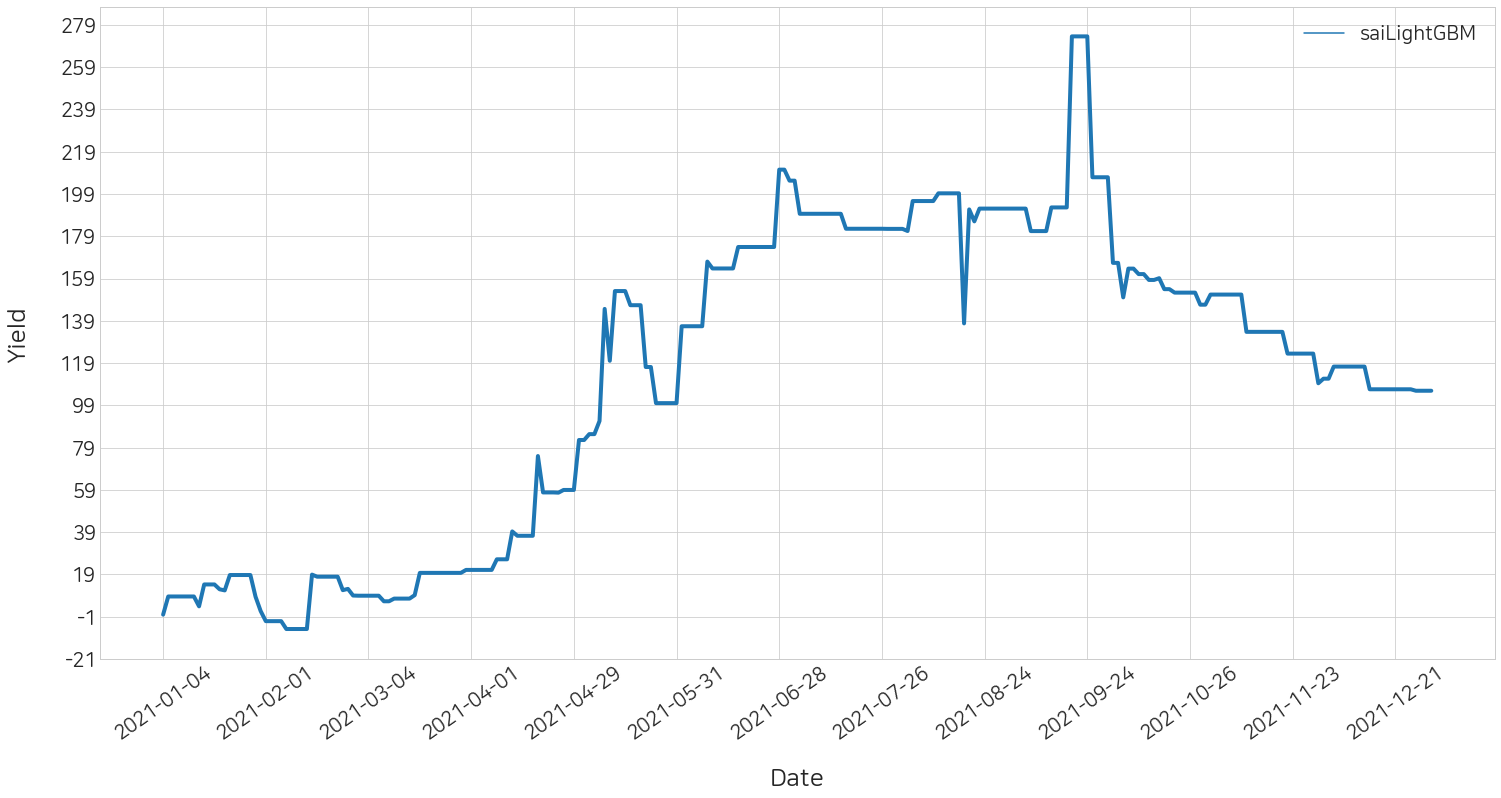

In [14]:
sai.yield_plot(df_history_all)